In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('data/diamonds.csv', index_col='Unnamed: 0')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
class myLinearRegression:
    def __init__(self):
        self.intercept = 0
        self.learning_rate = 0.01
    
    def train(self, data, target, gradient='batch'):
        # check size of data and initialize coefs
        data_np = np.asarray(data)
        try: 
            self.theta = [0 for i in range(data.shape[1])]
        except:
            self.theta = [0]
        self.batch_gradient_descent(data_np)

    def predict_one(self, datum):
        prediction = self.intercept
        for coef, feature in zip(self.theta, datum):
            prediction += coef*feature
        return prediction

    def predict(self, data):
        predictions = []
        data_np = np.asarray(data)
        for datum in data_np:
            predictions.append(self.predict_one(datum))
        return pd.Series(predictions)

    def cost_function(self, data, target):
        cost = 0
        data = np.asarray(data)
        target = np.asarray(target)
        for i in range(len(data)):
            cost += (self.predict_one(data[i]) - target[i])**2
        return 0.5*cost


    def batch_gradient_descent(self, data_np):

        for datum in data_np:
            for i in range(len(datum)):
                print(self.theta[i], datum[i])
                #self.theta[i]
            print('-')


lr = myLinearRegression()
lr.train(diamonds[['carat','x']].iloc[:5], diamonds['price'].iloc[:5])

#lr.predict(diamonds[['carat']].iloc[:5])
#lr.cost_function(diamonds[['carat']].iloc[:5], diamonds['price'].iloc[:5])


0 0.23
0 3.95
-
0 0.21
0 3.89
-
0 0.23
0 4.05
-
0 0.29
0 4.2
-
0 0.31
0 4.34
-


0    115.0
1    105.0
2    115.0
3    145.0
4    155.0
dtype: float64


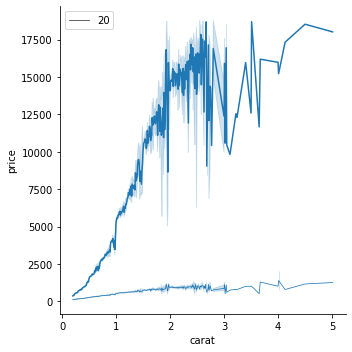

In [47]:
predictions = lr.predict(diamonds[['carat']])
print(predictions.head())
sns.relplot(x='carat', y='price', data=diamonds, kind='line')
sns.lineplot(x=diamonds['carat'], y=predictions, size=20)
plt.show()
